In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [37]:
from util import *

In [38]:
%run util

In [39]:
df = read_data('Comparisons - one sheet_06_26')

In [40]:
df_2 = read_data('Open Data Policy Comparison_08_24')

In [41]:
# Transpose the file
df_2 = df_2.T

In [42]:
new_header = df_2.iloc[0] #grab the first row for the header
df_2 = df_2[1:] #take the data less the header row
df_2 = df_2.rename(columns = new_header) #set the header row as the df header

In [43]:
df_2.columns.values[0] = "City"

In [44]:
df_2 = df_2[:-5]

This file has 61 columns. Those columns include information about cities as well as whether they comply with each of the 31 guidelines as laid out by Sunlight Foundation. Each row corresponds to a unique open data policy.

In [45]:
# drop all rows with nan's
df_2 = df_2.dropna(axis=0, how="all")

In [46]:
df_2[df_2["Year Enacted"].isnull()]

,City,BASICS,Type,Link,Legal Means,Year Enacted,Date Enacted,Prior Versions?,Population (ACS 2012; US Census 2012 est for counties),Guidance / Supplement,...,28. Create processes to ensure data quality,29. Ensure sufficient funding for implementation,30. Create or explore potential partnerships,31. Mandate future review for potential changes to this policy,nan,# of close fit,# of opposite,# of blank space and n/a,# of adopted guidelines,adoption rate of a version of policy(total score/31*2)
112,# of close fit (close fit assigns score 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11,7,2,0,NaN,NaN,NaN,NaN,11.5412844,NaN


# Overall Cities Analysis

####  The following code is used to convert the datatypes into the desired format (string, int, float etc.)

In [47]:
df_2['adoption rate of a version of policy(total score/31*2)'] = df_2['adoption rate of a version of policy(total score/31*2)'].astype(str)

In [48]:
df_2['adoption rate of a version of policy(total score/31*2)'] = df_2['adoption rate of a version of policy(total score/31*2)'].str.replace('%','')
df_2['adoption rate of a version of policy(total score/31*2)'] = df_2['adoption rate of a version of policy(total score/31*2)'].astype(float)/100

In [49]:
df_2['Year Enacted'] = pd.to_numeric(df_2['Year Enacted'], errors="coerce")
df_2['City'] = df_2['City'].astype('str')

#### Filtering the dataframe to be used later

In [50]:
all_sunlight_cities = df_2.groupby(['City', 'Year Enacted', 'adoption rate of a version of policy(total score/31*2)'], as_index=False).sum().iloc[:,0:3]

In [51]:
all_sunlight_cities['Year Enacted'] = all_sunlight_cities['Year Enacted'].apply(np.floor)

In [52]:
all_sunlight_cities.head()

,City,Year Enacted,adoption rate of a version of policy(total score/31*2)
0,"Amherst, NY",2014.0,0.3710
1,"Anchorage, AK",2016.0,0.7097
2,"Arlington County, VA",2016.0,0.2903
3,"Asheville, NC",2015.0,0.5806
4,"Austin, TX",2011.0,0.0000


#### Filtering the data based on year

In [53]:
all_sunlight_cities_filtered_by_year = all_sunlight_cities.sort_index(by=['Year Enacted'], ascending=[True])

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [54]:
all_cities_year_count = explore_analysis("City","Year Enacted", "groupby_count", all_sunlight_cities_filtered_by_year)

In [87]:
all_cities_year_count

,Year Enacted,City
0,2006.0,1
1,2009.0,3
2,2010.0,1
3,2011.0,6
4,2012.0,9
5,2013.0,15
6,2014.0,25
7,2015.0,11
8,2016.0,28
9,2017.0,10


######### what was special in these years?
[fill in]

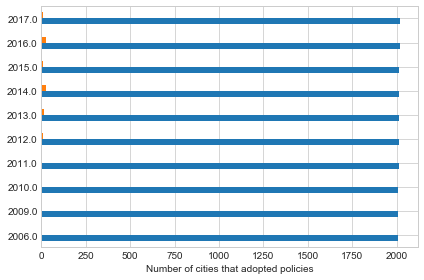

In [93]:
horizontal_bar_from_dataframe(all_cities_year_count, 'Year Enacted', 'City', 'Number of cities that adopted policies')

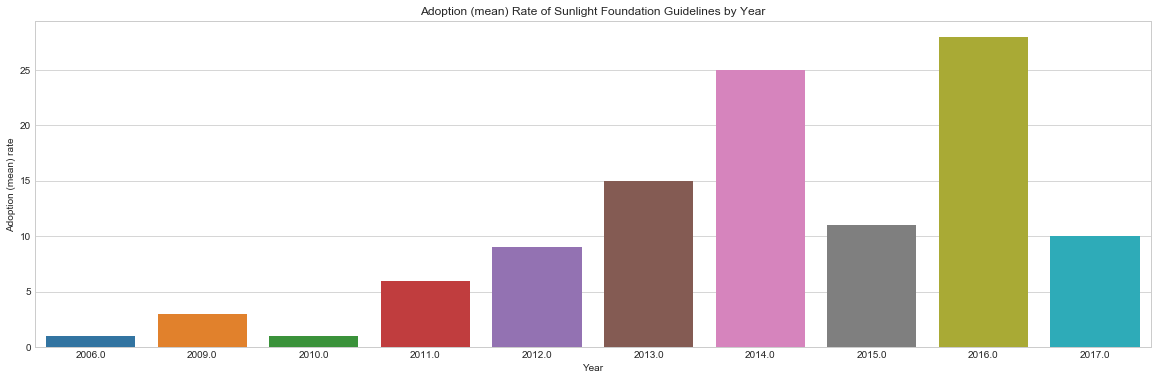

In [101]:
visual = seaborn_chart('Year Enacted', 'City', all_cities_year_count, 'Year', 'Adoption (mean) rate', 'Adoption (mean) Rate of Sunlight Foundation Guidelines by Year')

### Adoption (mean) rate

In [104]:
all_cities_year_mean = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted", "groupby_mean", all_sunlight_cities_filtered_by_year)

In [105]:
all_cities_year_mean

,Year Enacted,adoption rate of a version of policy(total score/31*2)
0,2006.0,0.000000
1,2009.0,0.172067
2,2010.0,0.000000
3,2011.0,0.123667
4,2012.0,0.288522
5,2013.0,0.347320
6,2014.0,0.352908
7,2015.0,0.436955
8,2016.0,0.469468
9,2017.0,0.651610


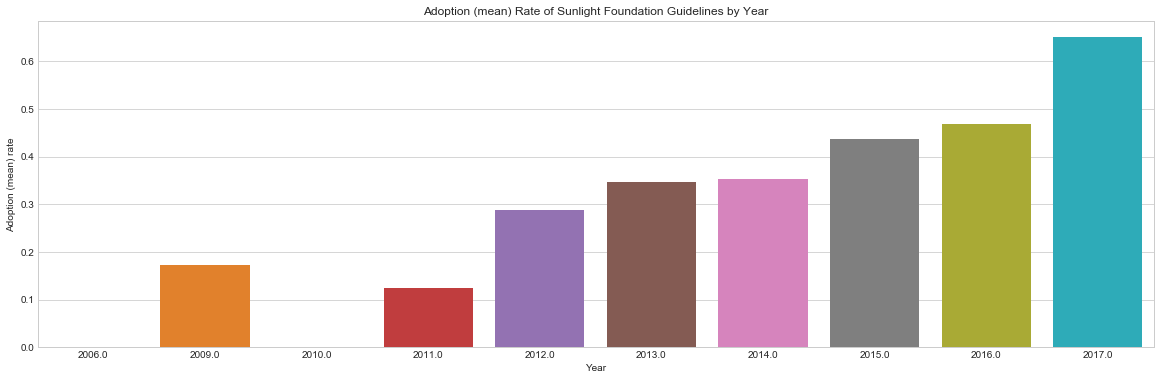

In [106]:
visual_mean = seaborn_chart('Year Enacted', 'adoption rate of a version of policy(total score/31*2)', all_cities_year_mean, 'Year', 'Adoption (mean) rate', 'Adoption (mean) Rate of Sunlight Foundation Guidelines by Year')

### Adoption (median) rate

In [107]:
all_cities_year_median = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted_up", "groupby_median", all_sunlight_cities_filtered)

NameError: name 'all_sunlight_cities_filtered' is not defined

In [108]:
all_cities_year_median

NameError: name 'all_cities_year_median' is not defined

In [109]:
visual_1_median = seaborn_chart('Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)', all_cities_year_median, 'Year', 'Adoption (median) rate of Sunlight guidelines', 'Adoption (median) Rate of Sunlight Foundation Guidelines by Year')

NameError: name 'all_cities_year_median' is not defined

Insights:
- one one data point for 2017. Do we have more?
- no data on 2010 for the adoption rate.
- Interestingly, the adoption rate of 2009 > adoption rate of 2011. What does that mean?

# Cities that have passed multiple policies

In [50]:
#finding cities with multiple policies
all_cities_duplicate = all_sunlight_cities.duplicated("City", keep=False)

In [51]:
all_cities_duplicate_full = all_sunlight_cities[all_cities_duplicate]

In [52]:
all_cities_duplicate_full.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
3,"Austin, TX",2011.0,0.00
4,"Austin, TX",2013.0,0.52
5,"Baltimore, MD",2011.0,0.00
6,"Baltimore, MD",2016.0,0.00
9,"Cambridge, MA",2014.0,0.00


In [53]:
all_cities_duplicate_full = all_cities_duplicate_full.sort_index(by=['Year Enacted_up'], ascending=[True])

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [54]:
all_cities_duplicate_full.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
83,"Washington, D.C.",2006.0,0.0
65,"San Francisco, CA",2009.0,0.0
66,"San Francisco, CA",2010.0,0.0
3,"Austin, TX",2011.0,0.0
5,"Baltimore, MD",2011.0,0.0


In [55]:
m_cities = {}
for city in all_cities_duplicate_full.values:
    
    if city[0] in m_cities:
        m_cities[city[0]].append(city[1])
        m_cities[city[0]].append(city[2])
        
    else:
        m_cities[city[0]] = []
        m_cities[city[0]].append(city[1])
        m_cities[city[0]].append(city[2])

In [61]:
for city, values in m_cities.items():
    print(city, values)

Kansas City, MO [2014.0, 0.37, 2014.0, 0.26, 2015.0, 0.03]
Tulsa, OK [2013.0, 0.26, 2015.0, 0.52]
Austin, TX [2011.0, 0.0, 2013.0, 0.52]
Baltimore, MD [2011.0, 0.0, 2016.0, 0.0]
New Hampshire [2012.0, 0.0, 2013.0, 0.15]
San Francisco, CA [2009.0, 0.0, 2010.0, 0.0, 2013.0, 0.53]
Washington, D.C. [2006.0, 0.0, 2011.0, 0.1, 2014.0, 0.58]
Scottsdale, AZ [2016.0, 0.32, 2017.0, 0.81]
Seattle, WA [2016.0, 0.68, 2016.0, 0.77]
Las Vegas [2014.0, 0.34, 2016.0, 0.68]
Cambridge, MA [2014.0, 0.0, 2015.0, 0.63]


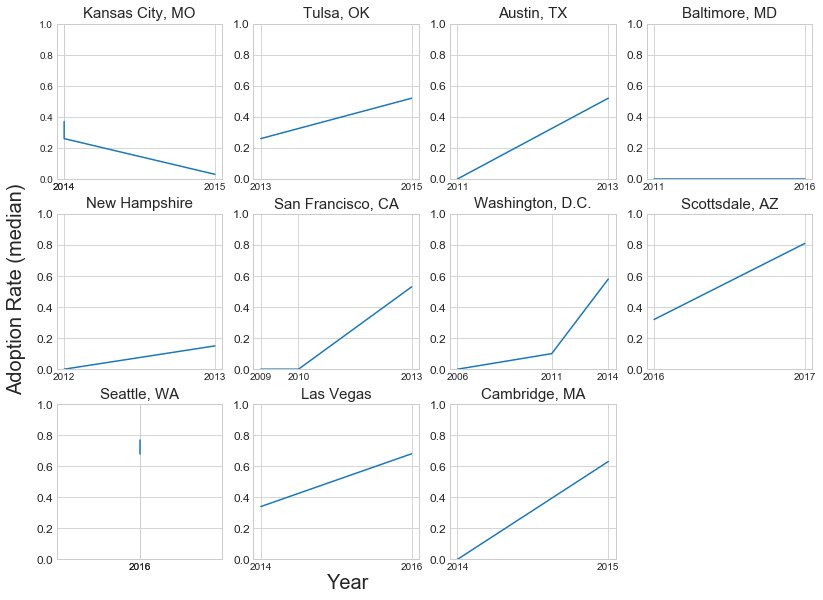

In [67]:
fig = plt.figure(figsize = (11,8))

fig.text(0.4, -0.02, 'Year', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Adoption Rate (median)', va='center', rotation='vertical', fontsize=20)

font = {'weight' : 'medium', 'size'   : 5}
plt.rc('font', **font)
plt.subplots_adjust(hspace=.005)

rows = 3
cols = 4
n = 1

for city, values in m_cities.items():
    plt.subplot(rows, cols, n)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=12)

    plt.title(city, fontsize=15)
    x=[]
    y=[]
    
    for i in range(len(values)):
        if i % 2 != 0:
            y.append(values[i])
        else:
            x.append(values[i])
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.xticks(x)
    #plt.yticks(xrange(10), (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
    
    plt.plot(x, y, linewidth=1.5)
    n += 1
    
    #plt.xlabel('Year', fontsize=15)
    #plt.ylabel('Number of policies', fontsize=15)
plt.tight_layout()

plt.savefig("multiple-policies-analysis", format='png')


# State vs. City wide Analysis

In [68]:
all_sunlight_cities["City"] = all_sunlight_cities["City"].astype(str)

In [69]:
all_sunlight_cities.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,"Amherst, NY",2014.0,0.37
1,"Anchorage, AK",2016.0,0.71
2,"Asheville, NC",2015.0,0.58
3,"Austin, TX",2011.0,0.00
4,"Austin, TX",2013.0,0.52


In [77]:
def extracting_states(df):
    all_states = []
    for city in df["City"]:
        if "," in city:
            if "D.C." in city:
                state = city[-4:]
            else:
                state = city.rstrip()[-2:]
        else:
            state = city

        all_states.append(state)
    df["State"] = all_states
    return df

In [78]:
all_sunlight_cities_with_states = extracting_states(all_sunlight_cities)

In [79]:
all_sunlight_cities_with_states.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2),State
0,"Amherst, NY",2014.0,0.37,NY
1,"Anchorage, AK",2016.0,0.71,AK
2,"Asheville, NC",2015.0,0.58,NC
3,"Austin, TX",2011.0,0.00,TX
4,"Austin, TX",2013.0,0.52,TX


In [80]:
all_cities_state_count = explore_analysis("City","State", "groupby_count", all_sunlight_cities)
all_cities_state_count.sort_values("City", ascending = False, inplace = True)

In [81]:
all_cities_state_count.head()

,State,City
3,CA,11
37,TX,5
21,MO,4
26,NY,4
10,IL,4


In [42]:
all_states_mean = explore_analysis("adoption rate of a version of policy(total score/31*2)","State", "groupby_mean", all_sunlight_cities)
#all_cities_state_mean.sort_values("City", ascending=False, inplace=True)

In [43]:
all_states_mean.head()

,State,adoption rate of a version of policy(total score/31*2)
0,AK,0.710000
1,AR,0.320000
2,AZ,0.613333
3,CA,0.352727
4,CT,0.350000


In [44]:
all_cities_mean = all_sunlight_cities.groupby(['State','City'])['adoption rate of a version of policy(total score/31*2)'].mean().reset_index()

In [67]:
all_cities_mean.head()

,State,City,adoption rate of a version of policy(total score/31*2)
0,AK,"Anchorage, AK",0.710
1,AR,"Little Rock, AR",0.320
2,AZ,"Mesa, AZ",0.710
3,AZ,"Scottsdale, AZ",0.565
4,CA,"Los Angeles, CA",0.230


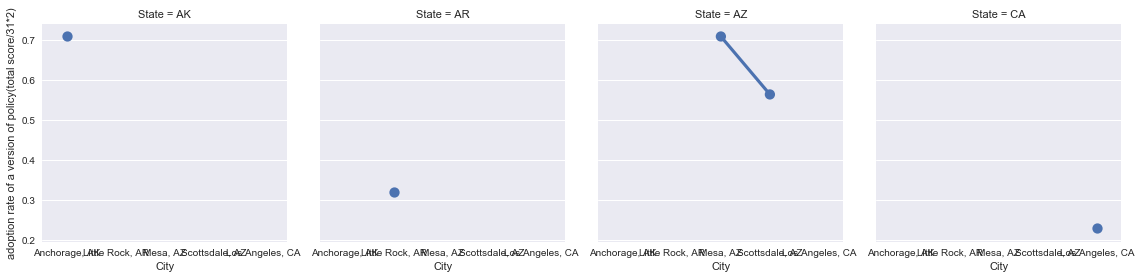

In [66]:
sns.set(font_scale=1)
sns.factorplot(x="City", y="adoption rate of a version of policy(total score/31*2)", col="State", sharex=False, data=all_cities_mean.head(), gridspec_kws={"width_ratios": [5, 3, 3]})
